In [20]:
"""
Paul Scala
Z23561522
COP4613
February 6 2023
Assignment 2
Problem 2
Link to Google Collab
https://colab.research.google.com/drive/1Z946JeIxrtmDEpkMDIV1bw3g3FattDiy?usp=sharing
"""

'\nPaul Scala\nZ23561522\nCOP4613\nJanuary 23 2023\nAssignment 2\nProblem 2\nLink to Google Collab\nhttps://colab.research.google.com/drive/1KTzSQex01eO5GB7AKanOXQM05Nk6Df0l?usp=sharing\n'

In [2]:
#importing libraries as defined in problem description
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

2023-02-06 22:49:45.334059: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Part (a)
# Load and split the MNIST dataset into the training and testing sets, then print the number of images and the image dimensions in each set.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Number of images in training set: ", x_train.shape[0])
print("Number of images in test set: ", x_test.shape[0])
print("Image width and height: ", x_train.shape[1], x_train.shape[2])

11490434/11490434 [==============================] - 1s 0us/step
Number of images in training set:  60000
Number of images in test set:  10000
Image width and height:  28 28


In [4]:
# Part (b)
# Write a function that takes images and their labels as inputs and plots a figure with 10 subplots for each digit (0-9).
def plot_images(images, labels):
  fig, ax = plt.subplots(2, 5, figsize=(15, 6))
  ax = ax.ravel()
  for i in range(10):
    ax[i].imshow(images[labels == i][0], cmap='gray')
    ax[i].set_title(i)
    ax[i].axis('off')

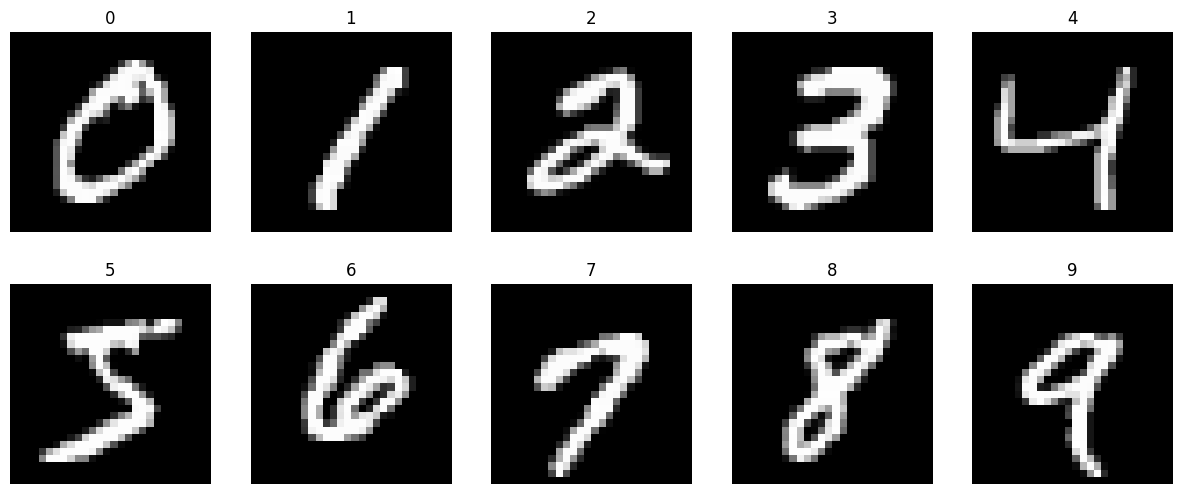

In [5]:
# Part (c)
# Plot images from the training set for each digit using the function from part b.
plot_images(x_train, y_train)

In [6]:
# Part (d)
# Select the 0 and 8 digits from the training and testing sets.
index_0 = np.where(y_train == 0)
index_8 = np.where(y_train == 8)
x_train_01 = np.concatenate((x_train[index_0], x_train[index_8]))
y_train_01 = np.concatenate((y_train[index_0], y_train[index_8]))
index_0 = np.where(y_test == 0)
index_8 = np.where(y_test == 8)
x_test_01 = np.concatenate((x_test[index_0], x_test[index_8]))
y_test_01 = np.concatenate((y_test[index_0], y_test[index_8]))


In [7]:
# Part (e)
# Divide the training set into a validation set (500 images) and the remaining training set.
n = 500
index = np.random.choice(x_train_01.shape[0], n, replace=False)
x_valid_01 = x_train_01[index]
y_valid_01 = y_train_01[index]
x_train_01 = np.delete(x_train_01, index, axis=0)
y_train_01 = np.delete(y_train_01, index, axis=0)

In [8]:
# Part (f)
# Print the number of images in each set (training, validation, and testing).
print("Number of images in training set: ", x_train_01.shape[0])
print("Number of images in validation set: ", x_valid_01.shape[0])
print("Number of images in test set: ", x_test_01.shape[0])


Number of images in training set:  11274
Number of images in validation set:  500
Number of images in test set:  1954


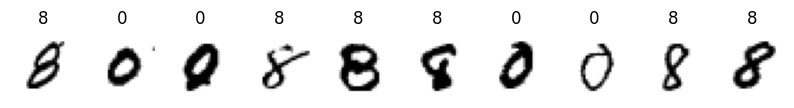

In [19]:
# Part (g)
# Plot 10 images from the validation set using the function from part b.
def plot_images(images, labels):
    fig, axs = plt.subplots(1, 10, figsize=(10, 1))
    for i, ax in enumerate(axs):
        ax.imshow(images[i], cmap='binary')
        ax.set_title(str(labels[i]))
        ax.axis('off')
        
# make sure x_valid_01 and y_valid_01 are not empty
if len(x_valid_01) > 0 and len(y_valid_01) > 0:
    plot_images(x_valid_01, y_valid_01)
    plt.show()
else:
    print("x_valid_01 or y_valid_01 is empty, cannot plot the images.")

In [13]:
# h) Convert each image in the three training, validation and testing sets to one attribute
# by calculating the average of all the pixel values in the center 4x4 grid of the image.
def calculate_attribute(images):
    # reshape the 1-dimensional array back into the original 2-dimensional image
    images = images.reshape(images.shape[0], 28, 28)
    
    # calculate the average of the center 4x4 grid of the image
    center_4x4 = images[:, 12:16, 12:16]
    return center_4x4.mean(axis=(1, 2))

x_train_01_att = calculate_attribute(x_train_01)
x_valid_01_att = calculate_attribute(x_valid_01)
x_test_01_att = calculate_attribute(x_test_01)

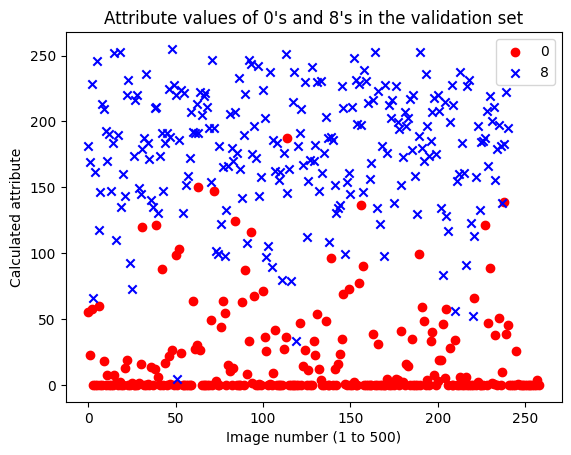

In [16]:
# i) Plot the attribute values of the 500 images in the validation set that you calculated in
# part (h). Use different colors and shapes for 0's and 8's. The x-axis in your figure is the image number (1 to 500), and the y-axis is the calculated attribute. Label the axes and add legends appropriately.
def plot_attributes(attributes, labels):
    fig, ax = plt.subplots()
    for label, color, marker in zip([0, 8], ['red', 'blue'], ['o', 'x']):
        indices = labels == label
        ax.scatter(range(sum(indices)), attributes[indices], c=color, marker=marker, label=str(label))
    ax.legend()
    ax.set_xlabel('Image number (1 to 500)')
    ax.set_ylabel('Calculated attribute')
    ax.set_title('Attribute values of 0\'s and 8\'s in the validation set')

plot_attributes(x_valid_01_att, y_valid_01)
plt.show()

In [17]:
# j) Based on your observation from the plot (i.e., validation set), guess a threshold on the attribute you think would differentiate the two classes with the highest accuracy.
threshold = 200

In [18]:
# k) Calculate the training, validation, and testing accuracies based on the selected threshold on the corresponding sets and print them
def accuracy(x_flattened, y, threshold):
  y_pred = (x_flattened >= threshold).astype(int)
  return np.mean(y_pred == y)

train_acc = accuracy(x_train_01_att, y_train_01, threshold)
valid_acc = accuracy(x_valid_01_att, y_valid_01, threshold)
test_acc = accuracy(x_test_01_att, y_test_01, threshold)

print(f'Train accuracy: {train_acc}')
print(f'Validation accuracy: {valid_acc}')
print(f'Test accuracy: {test_acc}')

Train accuracy: 0.5007982969664715
Validation accuracy: 0.518
Test accuracy: 0.5015353121801432
